# Template code for conditional quantile-unbiased analysis

This template provides regression tables and point plots for conditional, hybrid, and projection estimates.

Instructions:

1. Upload a file named `data.csv` to this folder with your conventional estimates. Open `data.csv` to see an example. In this file, we named our dependent variable "dep_variable", and have estimated the effects of 3 policies named "policy0", "policy1", and "policy2". The first column of `data.csv` contains the conventional estimates $X$ of the true unknown mean. The remaining columns contain consistent estimates of the corresponding covariance matrix $\Sigma$. In the example `data.csv` file provided, $X=(1\quad 2\quad 3)$ and $\Sigma = I$.
2. Modify the code if necessary.
3. Run the notebook.

In [1]:
from conditional_inference.quantile_unbiased.rqu import RQU

import seaborn as sns

alpha = .05
rqu = RQU.from_csv("data.csv")
sns.set()

In [2]:
rqu_result = rqu.fit(cols="sorted")
rqu_result.summary(title="Conditional estimates", alpha=alpha)

<class 'statsmodels.iolib.summary.Summary'>
"""
          Conditional estimates           
==========================================
        coef (median) pvalue [0.025 0.975]
------------------------------------------
policy2         1.686  0.143 -1.933  3.933
policy1         1.000  0.285 -2.922  4.922
policy0         0.314  0.406 -1.933  3.933
==========================
Dep. Variable dep_variable
--------------------------
"""

<AxesSubplot:title={'center':'Conditonal estimates'}, xlabel='dep_variable'>

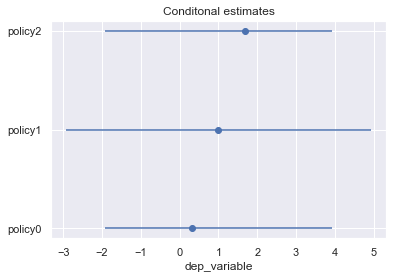

In [3]:
rqu_result.point_plot(title="Conditonal estimates", alpha=alpha)

In [4]:
rqu_result = rqu.fit(cols="sorted", beta=.005)
rqu_result.summary(title="Hybrid estimates", alpha=alpha)

<class 'statsmodels.iolib.summary.Summary'>
"""
             Hybrid estimates             
==========================================
        coef (median) pvalue [0.025 0.975]
------------------------------------------
policy2         1.688  0.142 -0.970  3.977
policy1         1.000  0.288 -1.970  3.970
policy0         0.312  0.409 -1.977  2.970
==========================
Dep. Variable dep_variable
--------------------------
"""

<AxesSubplot:title={'center':'Hybrid estimates'}, xlabel='dep_variable'>

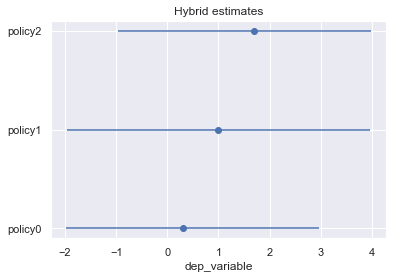

In [5]:
rqu_result.point_plot(title="Hybrid estimates", alpha=alpha)

In [6]:
projection_result = rqu.fit(cols="sorted", projection=True)
projection_result.summary(alpha=alpha)

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Projection estimates                     
==============================================================
        coef (conventional) pvalue 0.95 CI lower 0.95 CI upper
--------------------------------------------------------------
policy2               2.000  0.066        -0.394         4.394
policy1               1.000  0.405        -1.394         3.394
policy0               0.000  0.875        -2.394         2.394
==========================
Dep. Variable dep_variable
--------------------------
"""

<AxesSubplot:title={'center':'Projection estimates'}, xlabel='dep_variable'>

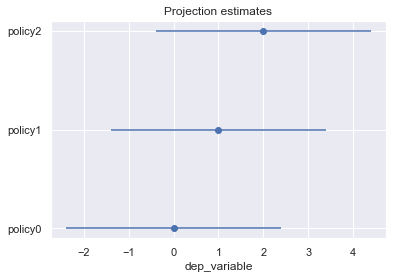

In [7]:
projection_result.point_plot(alpha=alpha)